# 06 Diversity in Baby Names 

### A Quick Pandas Exercise 

### Overview
<span>
    <table>
        <tr><td>Import the dataset<td><tr>
        <tr><td>Explore the dataset<td><tr>
        <tr><td>Calculate Diversity<td><tr>
    <table>
<span>

### Setup

In [3]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
import pandas as pd

# turn on data table rendering
pd.set_option('display.notebook_repr_html', True)
plt.style.use('ggplot')
pd.__version__

'1.4.2'

Use svg format instead of bitmap when mainly plotting line charts:

In [4]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# the notebook magic renders single plot at a time - need to work out a solution
# using the inline magic in lieu
# %matplotlib notebook

Force the plot to be the correct size (x% width, y% height):

In [3]:
# add the following if you need to set the height too...
# height: 75% !important;

In [5]:
%%html
<style>
.output_svg div{
  width: 85% !important;
}
</style>


## Data

In [8]:
# The data set contains the top 1000 baby names in the US
# for each year from 1880 until 2008
names_df = pd.read_csv('data/baby-names2.csv')
names_df.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


Note: [Soundex](https://en.wikipedia.org/wiki/Soundex) is a phonetic algorithm for indexing names by sound, as pronounced in English. 

## Explore the data

In [6]:
# Get popular names for 1969
names_df[names_df.year == 1969].tail()

,year,name,prop,sex,soundex
218995,1969,Josefina,0.000067,girl,J215
218996,1969,Marisela,0.000067,girl,M624
218997,1969,Sallie,0.000067,girl,S400
218998,1969,Suzan,0.000067,girl,S250
218999,1969,Francisca,0.000066,girl,F652


In [7]:
# Separate the boys from the girls
boys_df = names_df[names_df.sex == 'boy']
girls_df = names_df[names_df.sex == 'girl']
girls_df.head()

,year,name,prop,sex,soundex
129000,1880,Mary,0.072381,girl,M600
129001,1880,Anna,0.026678,girl,A500
129002,1880,Emma,0.020521,girl,E500
129003,1880,Elizabeth,0.019865,girl,E421
129004,1880,Minnie,0.017888,girl,M500


In [8]:
# Get the number of boy baby name rows per year (showing first 5) 
boys_df.groupby('year').size().head()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
dtype: int64

In [9]:
# Get the hierarchical index of baby name rows per year 
# grouped by gender for the year 1969
names_df.groupby(['year', 'sex']).size().loc[1969]

sex
boy     1000
girl    1000
dtype: int64

In [10]:
# Get the most popular boy name for the year 1969
rowid = boys_df[boys_df.year == 1969].prop.idxmax()
boys_df.loc[rowid]

year           1969
name        Michael
prop       0.046564
sex             boy
soundex        M240
Name: 89000, dtype: object

In [11]:
# Apply the get_max_proportion to the whole dataframe
# to get the most popular name for each year (showing first 5)
def get_max_proportion(group):
    return group.loc[group.prop.idxmax()]
    
popular_boys_df = boys_df.groupby('year').apply(get_max_proportion)
popular_boys_df.tail()

,year,name,prop,sex,soundex
year,,,,,
2004,2004,Jacob,0.013196,boy,J210
2005,2005,Jacob,0.012148,boy,J210
2006,2006,Jacob,0.011331,boy,J210
2007,2007,Jacob,0.010948,boy,J210
2008,2008,Jacob,0.010355,boy,J210


<AxesSubplot:title={'center':'Proportion most popular boy name'}, xlabel='year'>

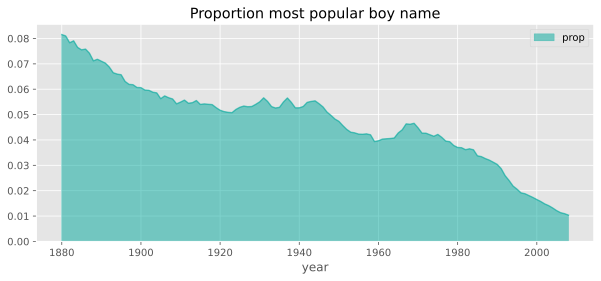

In [31]:
# Plot the proportion of the most popular boy name per year
# Maybe showing more diversity in chosen boy names over time
popular_boys_df.prop.plot(legend=True, title='Proportion most popular boy name', 
                          kind='area', color='#00A99D', alpha=.5, figsize=(10, 4))

In [13]:
# Set the index to a name/year combination
boys_index_df = boys_df.set_index(['name', 'year'])
boys_index_df.head()

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620


<AxesSubplot:title={'center':'Popularity of the name Leon'}, xlabel='year'>

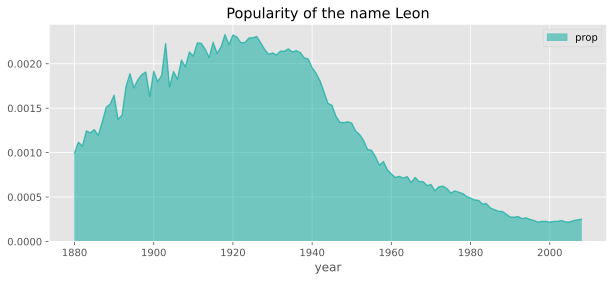

In [30]:
# Narcissistic query for the popularity of my first name
leon_popularity = boys_index_df.loc['Leon']
leon_popularity.prop.plot(kind='area', color='#00A99D', alpha=.5, 
                          legend=True, title='Popularity of the name Leon', figsize=(10,4))

In [15]:
# My name was the most popular in the year...
boys_index_df.loc['Leon'].prop.idxmax()

1918

In [16]:
# Highest boy name proportion ever...
boys_index_df.prop.idxmax()

('John', 1880)

In [17]:
# Calculate the mean proportion for each girl name in the set
# Show first 5 in descending order
mean_prop = girls_df.groupby('name')['prop'].mean()

mean_prop.sort_values(ascending=False).head()

name
Mary         0.034976
Jennifer     0.011555
Elizabeth    0.010791
Margaret     0.010550
Helen        0.009568
Name: prop, dtype: float64

In [18]:
# Retrieve summary statistics for each year in the data set
result = girls_df.groupby('year').describe()
result.head(5)

prop                                                              \
       count      mean       std       min       25%       50%       75%   
year                                                                       
1880  1000.0  0.000935  0.003270  0.000041  0.000061  0.000123  0.000400   
1881  1000.0  0.000933  0.003214  0.000040  0.000061  0.000121  0.000407   
1882  1000.0  0.000931  0.003211  0.000043  0.000061  0.000121  0.000406   
1883  1000.0  0.000933  0.003131  0.000042  0.000067  0.000125  0.000433   
1884  1000.0  0.000931  0.003124  0.000044  0.000065  0.000128  0.000443   

                
           max  
year            
1880  0.072381  
1881  0.069986  
1882  0.070431  
1883  0.066737  
1884  0.066990

## Calculating Baby Name Diversity

In [19]:
# Get a single year of girl names and sort by proportion descending
girls_df_1972 = girls_df[girls_df.year == 1972]
girls_df_1972_sorted = girls_df_1972.sort_values(by='prop', ascending=False)
girls_df_1972_sorted.head()


,year,name,prop,sex,soundex
221000,1972,Jennifer,0.039447,girl,J516
221001,1972,Michelle,0.018157,girl,M240
221002,1972,Lisa,0.017086,girl,L200
221003,1972,Kimberly,0.016310,girl,K516
221004,1972,Amy,0.016042,girl,A500


In [20]:
# What is the proportion of this top 1000 girl names of the total names?
girls_df_1972_sorted.prop.cumsum().max()

0.843747000000001

In [21]:
# Where is the 50% crossover point for cumulative sum
girls_df_1972_cumsum = girls_df_1972_sorted.prop.cumsum()
print('girls_df_1972_cumsum: \n', girls_df_1972_cumsum)

girls_df_1972_cumsum: 
 221000    0.039447
221001    0.057604
221002    0.074690
221003    0.091000
221004    0.107042
            ...   
221995    0.843453
221996    0.843527
221997    0.843601
221998    0.843674
221999    0.843747
Name: prop, Length: 1000, dtype: float64


In [22]:
# The crossover can be seen as a meassure of diversity
# It's the number of names accounting for 50% of all the names given
# So the higher, the more creative name giving
crossover = girls_df_1972_cumsum.searchsorted(.5)
print('\n*** crossover = ', crossover)
print('\ndata around crossover: \n', girls_df_1972_cumsum[(crossover-2):(crossover+3)])


*** crossover =  90

data around crossover: 
 221088    0.496577
221089    0.498685
221090    0.500773
221091    0.502820
221092    0.504862
Name: prop, dtype: float64


In [23]:
# Let's calculate this crossover point for boys and girls per year
def get_crossover(group, quantile):
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]

q = .5

girls_crossover = girls_df.groupby('year').apply(get_crossover, quantile=q)
girls_crossover.name = 'girls'

boys_crossover = boys_df.groupby('year').apply(get_crossover, quantile=q)
boys_crossover.name = 'boys'

# Plot the crossover counts over time
girls_crossover.plot(kind='area', color='#00A99D', alpha=.5, legend=True)
boys_crossover.plot(title='Baby name diversity', kind='area', 
                    color='#F5CA0C', alpha=.5, legend=True)

TypeError: sort_index() got an unexpected keyword argument 'by'

### Done!

#### Next: _Mean, Median and Mode_